In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from math import sqrt
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('dados_turma_ds.csv', delimiter='\t')
# df.set_index('Nome',inplace=True)

df.tail(10)

Nome Eixo Economico Eixo Diplomático Eixo Civil Eixo Social
32       Humberto          36,60            42,00      56,90       42,40
33          Carol          64,00            31,90      61,90       26,60
34      Marcus V           50,60            31,90      60,00       29,30
35         Joao M          42,10            47,30      59,20       35,70
36          Magno          64,00            34,60      58,80       27,00
37       Aluno 33          73,80            20,20      70,80       17,90
38          Pável          60,40            38,30      55,00       39,00
39  Romero>Neymar          53,70            26,60      65,80       25,40
40            CHR          34,80            49,50      49,20       48,70
41       aluno_05           56,7             41,5       61,5        37,8

In [3]:
eixos = []

for column in list(df):
    if 'Eixo' in column:
        eixos.append(column)

eixos

['Eixo Economico', 'Eixo Diplomático', 'Eixo Civil', 'Eixo Social']

In [4]:
for eixo in eixos:
    df[eixo] = df[eixo].str.replace('.','').str.replace(',','.')
    df[eixo] = df[eixo].astype(float)
    
df.dtypes

Nome                 object
Eixo Economico      float64
Eixo Diplomático    float64
Eixo Civil          float64
Eixo Social         float64
dtype: object

In [5]:
df.corr()

Eixo Economico  Eixo Diplomático  Eixo Civil  Eixo Social
Eixo Economico          1.000000         -0.773891    0.276126    -0.530670
Eixo Diplomático       -0.773891          1.000000   -0.517604     0.668008
Eixo Civil              0.276126         -0.517604    1.000000    -0.718259
Eixo Social            -0.530670          0.668008   -0.718259     1.000000

In [6]:
df.corr()

Eixo Economico  Eixo Diplomático  Eixo Civil  Eixo Social
Eixo Economico          1.000000         -0.773891    0.276126    -0.530670
Eixo Diplomático       -0.773891          1.000000   -0.517604     0.668008
Eixo Civil              0.276126         -0.517604    1.000000    -0.718259
Eixo Social            -0.530670          0.668008   -0.718259     1.000000

In [7]:
# df['Eixo Economico'] = df['Eixo Economico'] * 100
# df['Eixo Diplomático'] = df['Eixo Diplomático'] * 10
# df['Eixo Social'] = df['Eixo Social'] * 0.1

In [8]:
df.head()

Nome  Eixo Economico  Eixo Diplomático  Eixo Civil  Eixo Social
0   aluno 1            54.3              30.3        68.1         30.7
1  elefante            55.5              29.8        69.6         23.8
2   aluno 3            53.7              37.8        60.8         27.9
3   aluno 4            64.0              31.9        65.0         26.6
4  cachorro            53.0              35.6        61.5         30.6

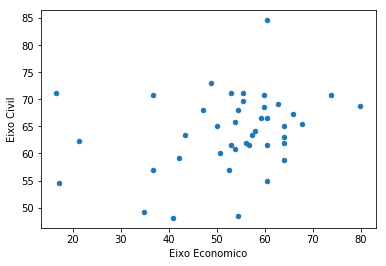

In [9]:
df[['Eixo Economico','Eixo Civil']].plot.scatter(x='Eixo Economico', y='Eixo Civil')

<img src="img\1_EyPd0sQxEXtTDSJgu72JNQ.jpeg">

### Normalizações


**1 - Standardisation:**
Standardisation replaces the values by their Z scores.

<img src="img\stan.png">

This redistributes the features with their mean μ = 0 and standard deviation σ =1 . sklearn.preprocessing.scale helps us implementing standardisation in python.

**2 - Mean Normalisation:**
mean.png
<img src="img\mean.png">

This distribution will have values between -1 and 1with μ=0.

Standardisation and Mean Normalization can be used for algorithms that assumes zero centric data like Principal Component Analysis(PCA).

**3 - Min-Max Scaling:**
<img src="img\maxmin.png">


This scaling brings the value between 0 and 1.

**4 - Unit Vector:**

<img src="img\unit.png">

Scaling is done considering the whole feature vecture to be of unit length.

Min-Max Scaling and Unit Vector techniques produces values of range [0,1]. When dealing with features with hard boundaries this is quite useful. For example, when dealing with image data, the colors can range from only 0 to 255.


### Quando escalar

Regra de ouro eu sigo aqui é qualquer algoritmo que calcula a distância ou assume a normalidade, escale suas features !!!

Alguns exemplos de algoritmos em que o dimensionamento de recursos é importante:

Os k vizinhos mais próximos com uma medida de distância euclidiana são sensíveis a grandezas e, portanto, devem ser dimensionados para que todos os recursos sejam pesados igualmente.
O escalonamento é crítico ao executar a Análise de Componente Principal (PCA). O PCA tenta obter os recursos com o máximo de variação e a variação é alta para recursos de alta magnitude. Isso inclina o PCA para recursos de alta magnitude.


Nós podemos acelerar a descida de gradiente escalando. Isso ocorre porque θ irá descer rapidamente em pequenas faixas e lentamente em grandes intervalos, e assim oscilará ineficientemente até o nível ótimo quando as variáveis ​​forem muito irregulares.


Os modelos baseados em árvore não são modelos baseados em distância e podem lidar com vários intervalos de recursos. Portanto, a normalização/escalonamento não é necessário durante a modelagem de árvores.

Algoritmos como o Linear Discriminant Analysis (LDA), o Naive Bayes são, por design, equipados para lidar com isso e dão pesos aos recursos de acordo. Realizar um dimensionamento de recursos nesses algoritmos pode não ter muito efeito.

In [10]:
# 1
df['eco_standart'] = (df['Eixo Economico'] - df['Eixo Economico'].mean())/df['Eixo Economico'].std()

In [11]:
# 2
df['eco_mean'] = (df['Eixo Economico'] - df['Eixo Economico'].mean())/(df['Eixo Economico'].max()-df['Eixo Economico'].min())

In [12]:
# 3
df['eco_maxmin'] = (df['Eixo Economico'] - df['Eixo Economico'].min())/(df['Eixo Economico'].max()-df['Eixo Economico'].min())

In [13]:
df.describe()

Eixo Economico  Eixo Diplomático  Eixo Civil  Eixo Social  \
count       42.000000         42.000000   42.000000    42.000000   
mean        52.983333         35.909524   64.057143    29.247619   
std         13.499773         10.439181    7.084134     8.865753   
min         16.500000          9.000000   48.100000    15.200000   
25%         49.100000         29.925000   60.975000    23.450000   
50%         55.500000         35.350000   64.600000    27.450000   
75%         60.400000         40.400000   68.725000    32.825000   
max         79.900000         67.600000   84.600000    61.100000   

       eco_standart      eco_mean  eco_maxmin  
count  4.200000e+01  4.200000e+01   42.000000  
mean   4.599495e-16  9.516197e-17    0.575447  
std    1.000000e+00  2.129302e-01    0.212930  
min   -2.702515e+00 -5.754469e-01    0.000000  
25%   -2.876592e-01 -6.125131e-02    0.514196  
50%    1.864229e-01  3.969506e-02    0.615142  
75%    5.493920e-01  1.169821e-01    0.692429  
max    1.993861e+00  4.245531e-01    1.000000

In [14]:
dfn = normalize(df[eixos])
dfn

array([[0.55867627, 0.31174753, 0.7006603 , 0.31586301],
       [0.57308265, 0.30770924, 0.71867662, 0.24575436],
       [0.57284831, 0.40323401, 0.64858804, 0.2976251 ],
       [0.63852766, 0.31826613, 0.64850465, 0.26538806],
       [0.56514344, 0.37960578, 0.65577965, 0.32629036],
       [0.57921611, 0.41750603, 0.65174063, 0.25579595],
       [0.5211736 , 0.42110827, 0.67752568, 0.30332303],
       [0.62044539, 0.31124992, 0.68310626, 0.22701727],
       [0.49012549, 0.39730726, 0.71877525, 0.29203782],
       [0.57503351, 0.38431888, 0.65979557, 0.29377759],
       [0.63259609, 0.37362707, 0.62370021, 0.26687648],
       [0.55037942, 0.39071981, 0.70607234, 0.21420172],
       [0.61652653, 0.36338319, 0.62775466, 0.30622179],
       [0.59851854, 0.26623066, 0.70861393, 0.26222719],
       [0.66193976, 0.32265897, 0.63945141, 0.2209725 ],
       [0.55599987, 0.30737351, 0.74692812, 0.19617354],
       [0.47983346, 0.41245259, 0.69524806, 0.34098804],
       [0.48443651, 0.39112292,

In [15]:
pd.DataFrame(dfn).describe()

0          1          2          3
count  42.000000  42.000000  42.000000  42.000000
mean    0.543688   0.371646   0.659415   0.302569
std     0.126191   0.110264   0.063941   0.093320
min     0.158930   0.085322   0.507462   0.146944
25%     0.497888   0.311374   0.630203   0.248598
50%     0.574058   0.368505   0.663405   0.288512
75%     0.616021   0.412329   0.704719   0.341611
max     0.717540   0.653152   0.802028   0.567874

### PCA

PCA é uma técnica de redução de dimensionalidade. Isso significa que podemos reduzir o número de atributos ou recursos em nosso dataframe. 


Por que nós precisamos disso? Por varios motivos mas principalmente por causa das limitações computacionais e diminuir possiveis overfitings em determinados modelos. Sabemos que quanto maior o número de recursos, melhor será a previsão. Mas muitas vezes, especialmente na produção, precisamos encontrar um ponto intermediário entre o poder computacional e a capacidade preditiva. (Isso depende de muitos outros fatores, por exemplo - nossa declaração de problema, nossa precisão requerida, o tempo que uma previsão pode esperar, etc.) 


Portanto, para tornar o processo computacionalmente eficiente, reduzindo o número de recursos, podemos fazer previsões relativamente mais rápidas em qualquer modelagem preditiva. Exemplo - no processamento de imagens para reconhecimento de dígitos (exemplo de conjunto de dados mnist), nem sempre usamos todos os pixels como dados de entrada, aqui usando pca podemos tornar nosso modelo computacionalmente eficiente.

Outra utilidade do PCA é na visualização dos dados.

O PCA é um método baseado em projeção que transforma os dados projetando-os em um conjunto de eixos ortogonais.

Vamos desenvolver uma compreensão intuitiva do PCA. Suponha que você deseje diferenciar entre diferentes itens alimentares com base em seu conteúdo nutricional. Qual variável será uma boa escolha para diferenciar itens alimentares? Se você escolher uma variável que varia muito de um item de alimento para outro, você será capaz de isolá-los corretamente. Seu trabalho será muito mais difícil se a variável escolhida for quase a mesma em itens alimentares. E se os dados não tiverem uma variável que segrega corretamente os itens alimentares? Podemos criar uma variável artificial através de uma combinação linear de variáveis ​​originais como:

```artVar1 = 2 X orgVar1 - 3 X orgVar2 + 5 X orgVar3``` 

Isso é essencialmente o que o PCA faz, ele encontra as melhores combinações lineares das variáveis ​​originais para que a variância ou dispersão ao longo da nova variável seja máxima.


Veremos no módulo 6 outras utilidades como a analise semantica e sistema de recomendação que usam técnicas parecidas com PCA.



Ver o video do Siraj: https://www.youtube.com/watch?v=jPmV3j1dAv4

In [16]:
pca = PCA(n_components=2)

pca.fit(dfn)

dft = pca.transform(dfn)

dft

array([[-0.04669308,  0.01213088],
       [-0.09060154,  0.05599997],
       [-0.00079741, -0.02073286],
       [-0.1089954 , -0.03406414],
       [ 0.00095334, -0.02771238],
       [-0.01432978,  0.00128608],
       [ 0.04231587,  0.02082282],
       [-0.12238938,  0.01931284],
       [ 0.03771224,  0.07034163],
       [-0.01692454, -0.01202717],
       [-0.06737686, -0.04924217],
       [-0.03678981,  0.07523634],
       [-0.04709233, -0.06034846],
       [-0.12409579,  0.0283406 ],
       [-0.13903878, -0.0268257 ],
       [-0.10434901,  0.11110859],
       [ 0.07759273,  0.03259651],
       [ 0.03706987,  0.07741989],
       [-0.21801994,  0.06700427],
       [ 0.54353961, -0.05018263],
       [-0.10605281,  0.02087795],
       [ 0.10575318,  0.16893822],
       [ 0.07368899, -0.19755459],
       [ 0.35145933,  0.19856682],
       [ 0.24840967, -0.1188376 ],
       [-0.08061294, -0.04511967],
       [-0.2778227 ,  0.17336914],
       [-0.14175108, -0.04017681],
       [-0.03192717,

In [17]:
final = pd.merge(pd.DataFrame(dft),df.reset_index(),how='inner',left_index=True,right_index=True)
final.rename(columns={0:'cp1',1:'cp2'},inplace=True)
final.reset_index(inplace=True)
final.head()

level_0       cp1       cp2  index      Nome  Eixo Economico  \
0        0 -0.046693  0.012131      0   aluno 1            54.3   
1        1 -0.090602  0.056000      1  elefante            55.5   
2        2 -0.000797 -0.020733      2   aluno 3            53.7   
3        3 -0.108995 -0.034064      3   aluno 4            64.0   
4        4  0.000953 -0.027712      4  cachorro            53.0   

   Eixo Diplomático  Eixo Civil  Eixo Social  eco_standart  eco_mean  \
0              30.3        68.1         30.7      0.097533  0.020768   
1              29.8        69.6         23.8      0.186423  0.039695   
2              37.8        60.8         27.9      0.053087  0.011304   
3              31.9        65.0         26.6      0.816063  0.173764   
4              35.6        61.5         30.6      0.001235  0.000263   

   eco_maxmin  
0    0.596215  
1    0.615142  
2    0.586751  
3    0.749211  
4    0.575710

In [18]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)

kmeans.fit(final[['cp1','cp2']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = final['cp1'].min() - 1, final['cp1'].max() + 1
y_min, y_max = final['cp2'].min() - 1, final['cp2'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [20]:
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

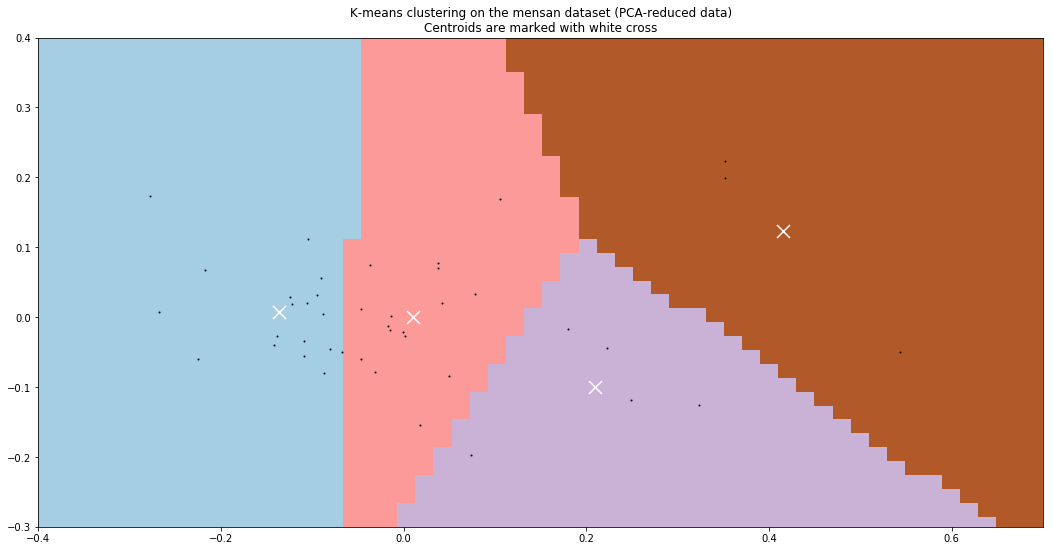

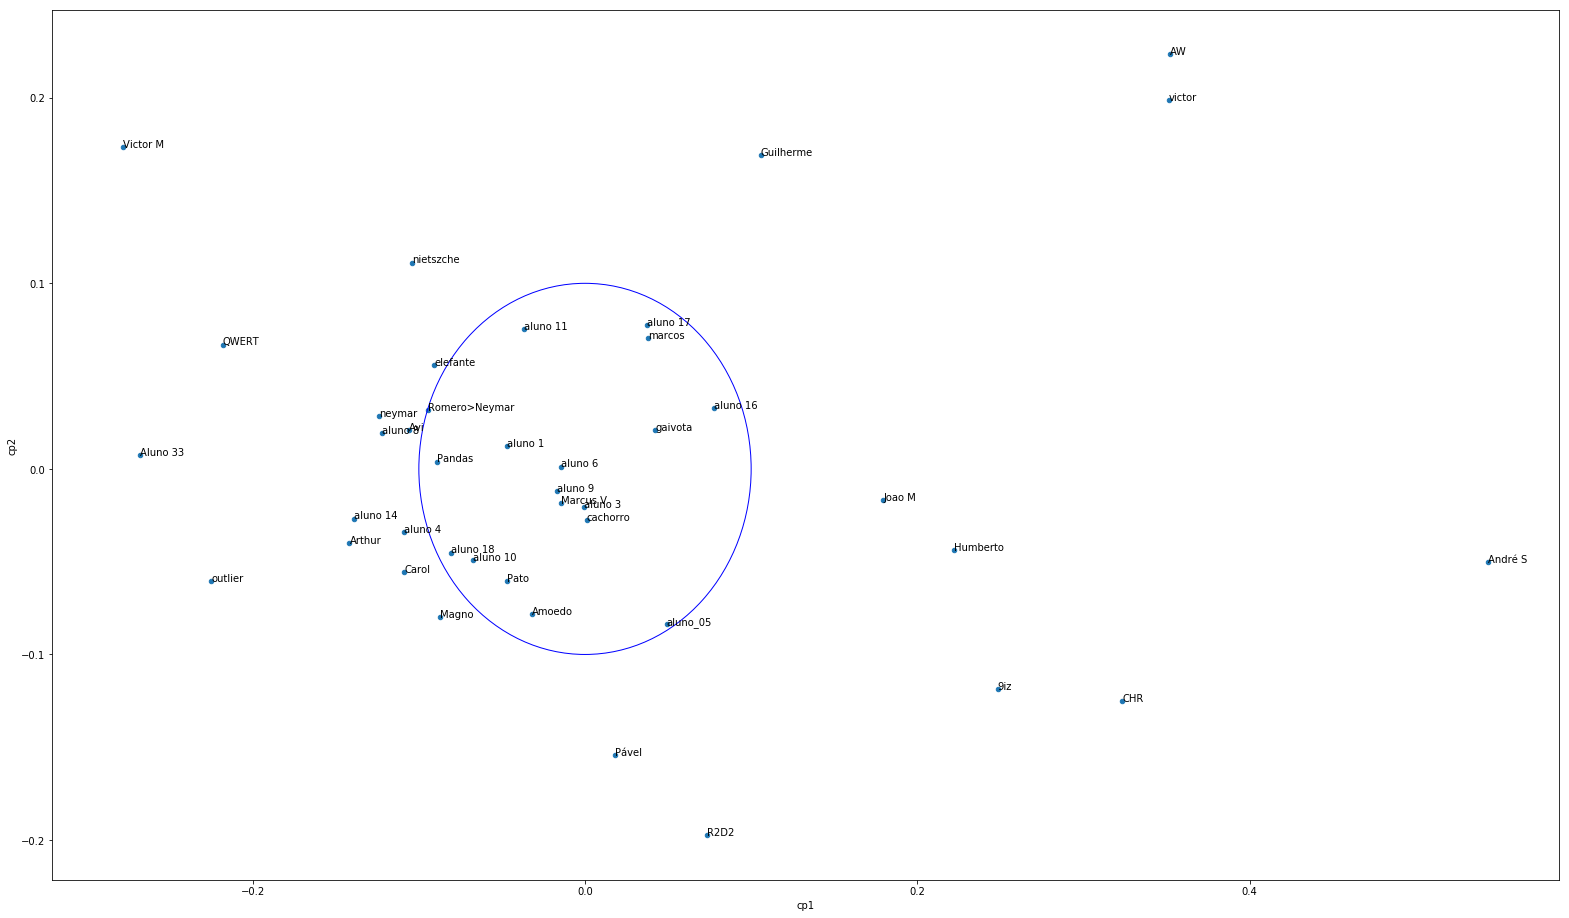

In [21]:
plt.figure(1).set_size_inches(18, 9)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(final['cp1'], 
         final['cp2'], 
         'k.', 
         markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the mensa
          n dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(-0.4,0.7)
plt.ylim(-0.3,0.4)

fig, ax = plt.subplots()

fig.set_size_inches(27, 16)

circle = plt.Circle((0, 0), .1, color='b', fill=False)
ax.add_artist(circle)

final.plot('cp1', 'cp2', kind='scatter', ax=ax)

for k, v in final.set_index('Nome')[['cp1','cp2']].iterrows():
    ax.annotate(k, v)

In [22]:
# dist = lambda p1, p2: sqrt(((p1-p2)**2).sum())
# dm = np.asarray([[dist(p1, p2) for p2 in final[['cp1','cp2']].values] for p1 in final[['cp1','cp2']].values])
# distance_matrix = pd.merge(pd.DataFrame(dm),final[['Nome']], how='inner',left_index=True,right_index=True)
# distance_matrix.set_index('Nome', inplace=True)
# distance_matrix.columns = list(final['Nome'])
# distance_matrix.to_excel('distance_matrix.xlsx')